# Trabajo Práctico 1 
## Cuaderno de trabajo
**Introducción a las Simulaciones Numéricas - 2021**

_Nicolás Vazquez - Última modificación: 29/4/2021_

Antes de empezar, voy a dejar copiado tal cual aparece en los examples de LAMMPS el script `in.melt`, como backup y por si es necesario volver al código fuente

In [8]:
!mkdir scripts

In [9]:
%%writefile "scripts/in.melt"
# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 10 0 10 0 10
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		50
run		250

Writing scripts/in.melt


A continuación, vamos a crear otro archivo `mymelt.in`, que es el que vamos a ir modificando de aquí en adelante. Por ahora, el código es igual al original, solo dupliqué las dimensiones de la caja, para obtener tiempos de walltime medibles. 

In [2]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		50
run		250

Overwriting scripts/mymelt.in


Para correr el archivo, se hace como si estuviéramos en la terminal. Jupyter puede llamarla anteponiendo `!` en la línea de código.

In [4]:
!mkdir logs

In [5]:
!lmp -in scripts/mymelt.in -l logs/my.log

LAMMPS (8 Apr 2021)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:94)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1.6795962 1.6795962 1.6795962
Created orthogonal box = (0.0000000 0.0000000 0.0000000) to (33.591924 33.591924 33.591924)
  1 by 1 by 1 MPI processor grid
Created 32000 atoms
  create_atoms CPU = 0.004 seconds
Neighbor list info ...
  update every 20 steps, delay 0 steps, check no
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 24 24 24
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up Verlet run ...
  Unit style    : lj
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 13.82 | 13.82 | 13.82 Mbytes
Step Temp E_pair E_mol Tot

### Modificando el script

#### Número de steps

Se modifican en la línea que dice `run`, cambiando el valor numérico (en este caso, necesitamos al menos 1000). 

In [6]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		100
run		1000

Overwriting scripts/mymelt.in


Si hacemos el test ahora de correr de vuelta, vamos a ver que cambia el log a la salida. Podemos modificar cada cuántos `timesteps` hay output variando el valor de `thermo` (actualmente 50).

Para calcular el _TPAS_ voy a implementar una pequeña función en Python, a la que le voy a pasar como input el wall time, el número de átomos y el número de steps. A futuro podríamos automatizar esto, haciendo que lea estos números directamente desde el log de Lammps, o de algún archivo en el que los escribamos luego de correr la simulación.

In [14]:
!lmp -in scripts/mymelt.in -screen none
# Si comentamos -screen none , nos va a imprimir el log en pantalla a medida que corre la simulación!

In [87]:
def TPAS(wall_time,n_atoms,n_steps):
    return wall_time/n_atoms/n_steps

In [16]:
TPAS(16,32000,1000)

5e-07

Ahora modifiquemos el número de timesteps de 1000 a 10000, y veamos qué pasa. Obviamente, el número de steps aumenta el wall time. Voy a aumentar también el valor de `thermo`, para que no se impriman tantos resultados.

In [7]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd

#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		2000
run		10000

Overwriting scripts/mymelt.in


In [18]:
!lmp -in mymelt.in -screen none

In [19]:
TPAS(120+45,32000,10000)

5.15625e-07

Vemos que comparativamente el TPAS ha cambiado muy poco al aumentar el timestep en un factor de 10. Intuitivamente lo asocio a que debe existir una relación lineal entre el wall time y el número de steps.

#### Incremento del número de átomos
Al aumentar en un factor de $2$ cada una de las dimensiones de la caja, el número de átomos que de la simulación deben aumentar en un factor de $2^3$. Veamos qué pasa y calculemos el TPAS. Cómo tenemos muchos átomos en juego, volvamos a poner 1000 steps. 

In [20]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 40 0 40 0 40
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd

#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		200
run		1000

Overwriting scripts/mymelt.in


In [21]:
!lmp -in mymelt.in -screen none

Efectivamente, ahora hay 256000 átomos en la simulación. Calculemos también el TPAS.

In [22]:
TPAS(60*2+26,256000,1000)

5.703125e-07

Da mas o menos igual. La explicación creo que tiene que estar en que el walltime crece linealmente con el número de átomos, entonces al calcular el TPAS los factores se cancelan mutuamente y no contribuyen.

**¿Qué ocurre si construimos una caja _elongada_?** 
Con elongada aquí nos referimos a aumentar el tamaño de la caja en una dimensión únicamente, en un factor de $2^3$. Preparemos el script...

In [1]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 160 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd

#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		200
run		1000

Overwriting scripts/mymelt.in


In [7]:
!lmp -in scripts/mymelt.in -screen none

In [6]:
TPAS(120+39,256000,1000) 

6.210937500000001e-07

Hemos perdido un poco de rendimiento al hacer estirar la caja en una única dimensión. 

##### Duplicando el `neighbor "skin"`

Tenemos documentación [acá.](https://lammps.sandia.gov/doc/neighbor.html)

Este comando setea parámetros que afectan la construcción de las listas de vecinos. Todos los pares de átomos que estén dentro de una `neighbor cutoff distance` (distancia de corte de la lista) igual a la distancia de corte de fuerza `force cutoff` mas la distancia de skin son almacenados en la lista. 

Intuitivamente, aumentar el parámetro de skin en la simulación hace que en el cálculo de la fuerza en cada átomo y en cada timestep considere una mayor cantidad de átomos, por lo que va a aumentar seguramente el walltime. Veamos qué pasa.

In [26]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.6 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd

dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

thermo		200
run		1000

Overwriting scripts/mymelt.in


In [27]:
!lmp -in mymelt.in -screen none

Lo primero que podemos notar es que aumentó - como era de esperar - el promedio de vecinos por átomo. Es de esperar también, un aumento en el TPAS que veníamos observando anteriormente.

In [28]:
TPAS(22,32000,1000)

6.875e-07

#### Algunas gráficas
La recomendación del profesor del curso fue que necesitábamos al menos 6000 pasos; 1000 para estabilizar el sistema, y otros 5000 puntos "significativos" para nuestro estudio. Para obtener curvas suaves en las gráficas, necesitamos al menos 100 puntos, por lo que vamos a poner un output de las variables termodinámicas mas o menos cada 50 pasos.

Para hacer los plots usaré `matplotlib` y Python. Levantamos los datos del log con `NumPy`.

Nos piden plotear la energía total, la energía cinética y la potencial de los diferentes logs. Para eso vamos a pedirle a LAMMPS que nos pase esas variables en el log, modificando el output de `thermo` (ver docu [acá](https://lammps.sandia.gov/doc/thermo_style.html)).

In [9]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 10 0 10 0 10
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd


#dump		id all atom 50 dump.melt

#dump		2 all image 25 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		50
run		6000

Overwriting scripts/mymelt.in


In [10]:
!lmp -in scripts/mymelt.in -l logs/energyplots.log -screen none

El output de nuestras simulaciones sale siempre al archivo `log.lammps`, asique vamos a ir a buscar los datos ahí. En un futuro podremos buscar algún patrón del log para automatizar la tarea, pero por ahora para resolver el problema vamos a decirle a Python que lea las líneas de ínteres, las cuales (al abrir el archivo) vemos que son las que empiezan en la línea 66 y terminan en la 186.

In [57]:
# Import de bibliotecas de Python que vamos a necesitar:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [13]:
!mkdir plots

mkdir: no se puede crear el directorio «plots»: El archivo ya existe


In [14]:
#DEBUG
data = np.loadtxt("logs/energyplots.log",skiprows=65,max_rows=186-65)
print(data[0:3]) #Primeras 3 líneas de datos
print(data[-3:]) #Últimas tres líneas de datos 

[[  0.          0.         -6.7733681   4.498875   -2.2744931]
 [ 50.          0.25       -4.7955425   2.513207   -2.2823355]
 [100.          0.5        -4.7492704   2.4681372  -2.2811332]]
[[ 5.9000000e+03  2.9500000e+01 -4.7678040e+00  2.4501252e+00
  -2.3176788e+00]
 [ 5.9500000e+03  2.9750000e+01 -4.7809207e+00  2.4627088e+00
  -2.3182119e+00]
 [ 6.0000000e+03  3.0000000e+01 -4.7652392e+00  2.4474276e+00
  -2.3178116e+00]]


In [15]:
#El bueno
step,time,ep,ek,etotal = np.loadtxt("logs/energyplots.log",skiprows=65,max_rows=186-65,unpack=True)

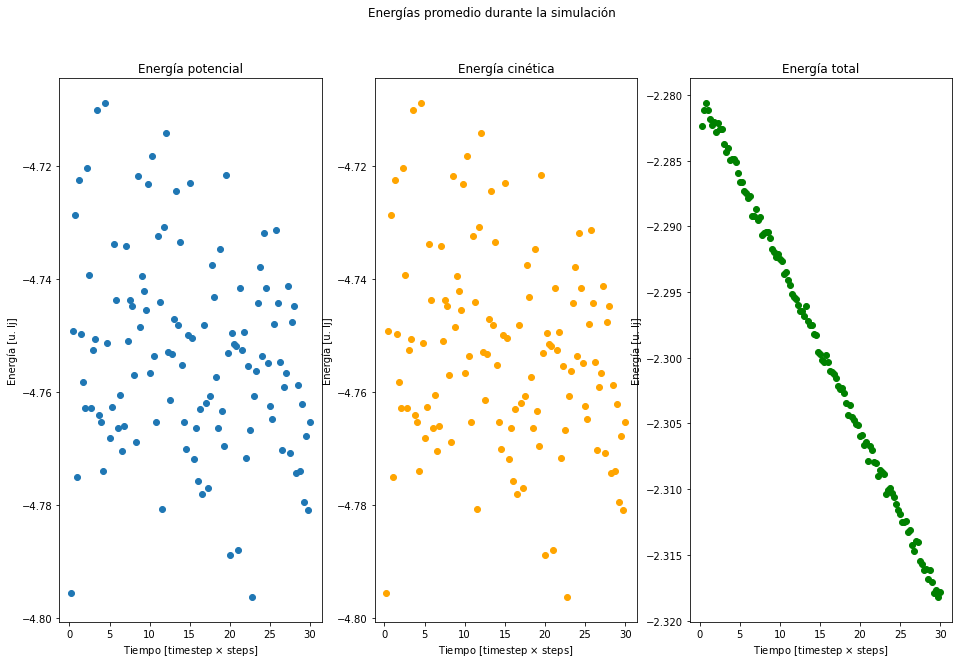

In [59]:
fig,axs = plt.subplots(1,3)
fig.set_size_inches((16,10))

fig.suptitle("Energías promedio durante la simulación")

axs[0].plot(time[1:],ep[1:],'o')
axs[0].set_title("Energía potencial")

axs[1].plot(time[1:],ep[1:],'o',color='orange')
axs[1].set_title("Energía cinética")

axs[2].plot(time[1:],etotal[1:],'o',color='green')
axs[2].set_title("Energía total")

for ax in axs:
    ax.set(xlabel='Tiempo [timestep $\\times$ steps]',
           ylabel='Energía [u. lj]')
fig.savefig("plots/Energia_plots.png",)

Calculemos ahora el promedio y la desviación estándar de estas tres cantidades. El primer punto de los datos lo tenemos que descartar, puesto que no es una situación de equilibrio del sistema. 

In [36]:
def mean_std(vec,jump=True):
    print("Promedio:",np.mean(vec))
    print("Desviación estándar:",np.std(vec))
    if jump==True:
        print("\n")

In [37]:
print("Energía potencial:")
mean_std(ep[1:])
print("Energía cinética:")
mean_std(ek[1:])
print("Energía total:")
mean_std(etotal[1:],jump=False)

Energía potencial:
Promedio: -4.752323565
Desviación estándar: 0.007941787896328809


Energía cinética:
Promedio: 2.4539521183333335
Desviación estándar: 0.011215531890968477


Energía total:
Promedio: -2.2983714450000003
Desviación estándar: 0.011093591024978127


Se ve que las cantidades medidas son estadísticamente similares (en el sentido de su desviación estándar).

#### Lectura y escritura en disco
En el inciso (f) del práctico nos piden testear cómo afecta al tiempo de simulación las entradas y salidas al disco (es decir, lectura y escritura), removiendo los comment de las líneas que dicen `dump` en el script.

In [59]:
!mkdir output

In [65]:
%%writefile scripts/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd


dump		id all atom 50 dump.melt

dump		2 all image 100 output/image.*.jpg type type &
		axes yes 0.8 0.02 view 60 -30
dump_modify	2 pad 3

dump		3 all movie 25 output/movie.mp4 type type &
		axes yes 0.8 0.02 view 60 -30
dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		100
run		1000

Overwriting scripts/mymelt.in


In [67]:
!lmp -in scripts/mymelt.in -screen none

Antes de calcular el TPAS, adjunto 2 de las imágenes del output, de los instantes inicial y final, respectivamente.

In [138]:
from IPython.display import Image,YouTubeVideo
Image("output/image.000.jpg",width=350)

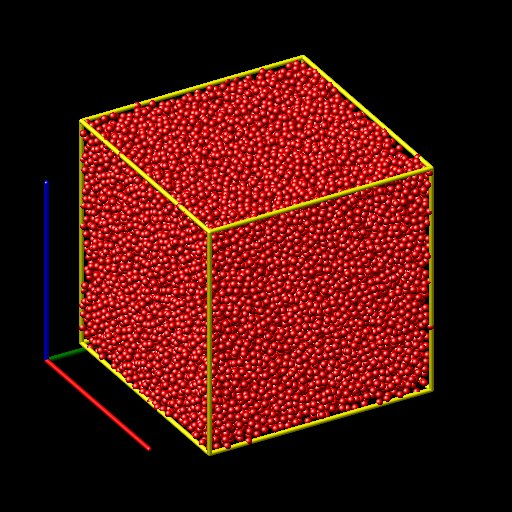

In [139]:
Image("output/image.1000.jpg",width=350)

Podemos incorporar aquí también el video de la simulación. Por problemas de compatibilidad, tuve que subirlo a YouTube.

In [70]:
YouTubeVideo('iRq693PKcy8')

In [71]:
TPAS(20,32000,1000)

6.25e-07

El tiempo necesario para la simulación se vio casi duplicado con la adición de video e imágenes.

### Paralelización

Vamos a correr la simulación en 2,3 y 4 cores sucesivamente. Para eso tenemos que correr ahora la simulación mediante MPI, y por el comando `mpirun`. El nro. de cores asignados está en `-np`. Para que los tiempos sean apreciables, vamos a incrementar en un factor de 8 el número de átomos y en un factor de 10 el número de steps.

In [61]:
!mkdir logs/strong_scaling
!mkdir scripts/strong_scaling

mkdir: no se puede crear el directorio «logs/strong_scaling»: El archivo ya existe


In [65]:
%%writefile scripts/strong_scaling/mymelt.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
#compute 1 all msd


#dump		id all atom 50 dump.melt

#dump		2 all image 100 image.*.jpg type type &
		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		2000
run		10000

Overwriting scripts/strong_scaling/mymelt.in


In [66]:
# 1 core
!mpirun -np 1 lmp_mpi -in scripts/strong_scaling/mymelt.in -screen none -l logs/strong_scaling/1cores.log
# 2 cores
!mpirun -np 2 lmp_mpi -in scripts/strong_scaling/mymelt.in -screen none -l logs/strong_scaling/2cores.log
# 3 cores
!mpirun -np 3 lmp_mpi -in scripts/strong_scaling/mymelt.in -screen none -l logs/strong_scaling/3cores.log
# 4 cores
!mpirun -np 4 lmp_mpi -in scripts/strong_scaling/mymelt.in -screen none -l logs/strong_scaling/4cores.log

In [74]:
X = np.linspace(1,4,100)
Y = (2*60+36)/X

In [100]:
plt.figure(figsize=(8,6))
Walltime=[2*60+36,60+23,62,52]
plt.plot([i for i in range(1,5)],Walltime,'o',label='Performance obtenida')
plt.plot(X,Y,'--',label='Performance esperada')
plt.xticks([i for i in range(1,5)])
plt.xlabel("Nro. de cores");plt.ylabel("Wall time [s]");plt.title("Wall time vs. nro. de cores - Strong scaling")
plt.grid();plt.legend()
#plt.show()
plt.savefig("plots/WalltimevsCores_Strong.png")

In [101]:
nsteps = 10000
natoms = 32000
Tpas = []
# Medición de TPAS 
for i in range(0,4):
    Tpas.append(TPAS(Walltime[i],natoms,nsteps))

Tpas

[4.875e-07, 2.59375e-07, 1.9375e-07, 1.6249999999999998e-07]

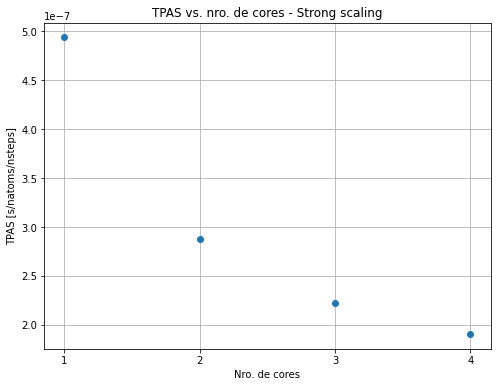

In [82]:
plt.figure(figsize=(8,6))
plt.plot([i for i in range(1,5)],Tpas,'o')
plt.xticks([i for i in range(1,5)])
plt.xlabel("Nro. de cores");plt.ylabel("TPAS [s/natoms/nsteps]");plt.title("TPAS vs. nro. de cores - Strong scaling")
plt.grid()

#plt.show()

plt.savefig("plots/TPASvscores_Strong.png")

Lo que se pide ahora es realizar de nuevo estas pruebas, pero escaleando a su vez el número de átomos. Es decir, si para 1 core ponemos 32000 átomos, para 2 cores ponemos 64000, etc. Eso se lo conoce como _"weak scaling"_.

In [77]:
!mkdir scripts/weak_scaling

In [78]:
%%writefile scripts/weak_scaling/mymelt_2cores.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 25.5 0 25.5 0 25.5
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
#compute 1 all msd


#dump		id all atom 50 dump.melt

#dump		2 all image 100 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		1000
run		10000

Writing scripts/weak_scaling/mymelt_2cores.in


In [79]:
!mkdir logs/weak_scaling

In [80]:
!mpirun -np 2 lmp_mpi -in scripts/weak_scaling/mymelt_2cores.in -screen none -l logs/weak_scaling/2cores.log

In [81]:
%%writefile scripts/weak_scaling/mymelt_3cores.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 28.845 0 28.845 0 28.845
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
#compute 1 all msd


#dump		id all atom 50 dump.melt

#dump		2 all image 100 image.*.jpg type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		2000
run		10000

Writing scripts/weak_scaling/mymelt_3cores.in


In [82]:
!mpirun -np 3 lmp_mpi -in scripts/weak_scaling/mymelt_3cores.in -screen none -l logs/weak_scaling/3cores.log

In [91]:
%%writefile scripts/weak_scaling/mymelt_4cores.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 31.5 0 31.5 0 31.5
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
#compute 1 all msd


#dump		id all atom 50 dump.melt

#dump		2 all image 100 image.*.jpg type type &
#		axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		2000
run		10000

Overwriting scripts/weak_scaling/mymelt_4cores.in


In [92]:
!mpirun -np 4 lmp_mpi -in scripts/weak_scaling/mymelt_4cores.in -screen none -l logs/weak_scaling/4cores.log

In [93]:
Walltime=[2*60+36,3*60+9,3*60+40,4*60+38]
plt.figure(figsize=(8,6))
plt.plot([i for i in range(1,5)],Walltime,'o')
plt.xticks([i for i in range(1,5)])
plt.xlabel("Nro. de cores");plt.ylabel("Wall time [s]");plt.title("Wall time vs. nro. de cores - Weak scaling")
plt.grid()

#plt.show()

plt.savefig("plots/WalltimevsCores_Weak.png")

In [88]:
#Cálculo de los TPAS
nsteps = 10000
natoms = [32000,66326,97556,125024]
Tpas = []
# Medición de TPAS 
for i in range(0,4):
    Tpas.append(TPAS(Walltime[i],natoms[i],nsteps))

plt.figure(figsize=(8,6))
plt.plot([i for i in range(1,5)],Tpas,'o')
plt.xticks([i for i in range(1,5)])
plt.xlabel("Nro. de cores");plt.ylabel("TPAS [s/natoms/nsteps]");plt.title("TPAS vs. nro. de cores - Weak scaling")
plt.grid()
#plt.show()
plt.savefig("plots/TPASvsCores_Weak.png")

Todos los resultados se muestran en la tabla:
<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Nº cores</th><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-style:italic;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" colspan="2">Strong scaling</th><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-style:italic;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal" colspan="2">Weak scaling</th></tr></thead><tbody><tr><td style="background-color:#333333;border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal"></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Walltime</span> [s]<br></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">TPAS </span>[us/natoms/nsteps]</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">Walltime</span> [s]<br></td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">TPAS</span> [us/natoms/nsteps]<br></td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-style:italic;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">156</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.487</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">156</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.487</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-style:italic;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">2</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">83</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.259</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">189</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.285</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-style:italic;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">3</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">62</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.194</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">220</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.255</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-style:italic;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">4</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">52</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.162</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">278</td><td style="border-color:#333333;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.255</td></tr></tbody></table>

In [94]:
Tpas

[4.875e-07,
 2.8495612580285256e-07,
 2.255115010865554e-07,
 2.2555669311492195e-07]

##### Nos mudamos a OVITO

Voy a dejar acá escrita una copia del script del que voy a sacar los snapshots que tengo que cargar en OVITO para análisis.

In [95]:
%%writefile scripts/mymelt_ovito.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd


dump		id all atom 50 dump_final.melt

#dump		2 all image 100 image.*.jpg type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal 
thermo		50
run		6000

Overwriting scripts/mymelt_ovito.in


In [96]:
!mpirun -np 4 lmp_mpi -in scripts/mymelt_ovito.in -screen none -l logs/mymelt_ovito.log

##### Estructura del material 

El material está en estado sólido al inicio de la simulación. Lo podemos deducir de la snapshot a tiempo 0 de la simulación, donde se nota claramente la estructura cristalina que surge de las posiciones de los átomos.



Para el resto de la simulación, podemos deducir de la falta de estructura y/u organización de los átomos que el estado del material es líquido. Para ello dejo muestra del estado final de la simulación, y adjunto un video similar al que renderizamos anteriormente en LAMMPS, pero esta vez hecho en OVITO. 



In [89]:
YouTubeVideo('5J4M1Pel41g')

El algoritmo incorporado en OVITO `PolyhedralTemplateMatching` identifica en el snapshot 0 que la estructura del sólido es fcc (_face centered cubic_).



Si hacemos _cheat_ y le indicamos a OVITO que no tenemos condiciones periódicas de borde (PBC), lo que sucede es que identifica defectos en los átomos de los bordes. Este es el output: en color verde, los átomos que identifica como FCC, en blanco, los defectos (figuran como `Other` en el histograma)

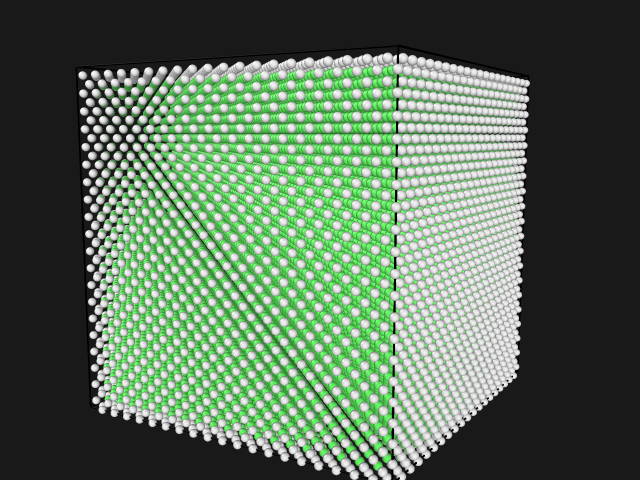

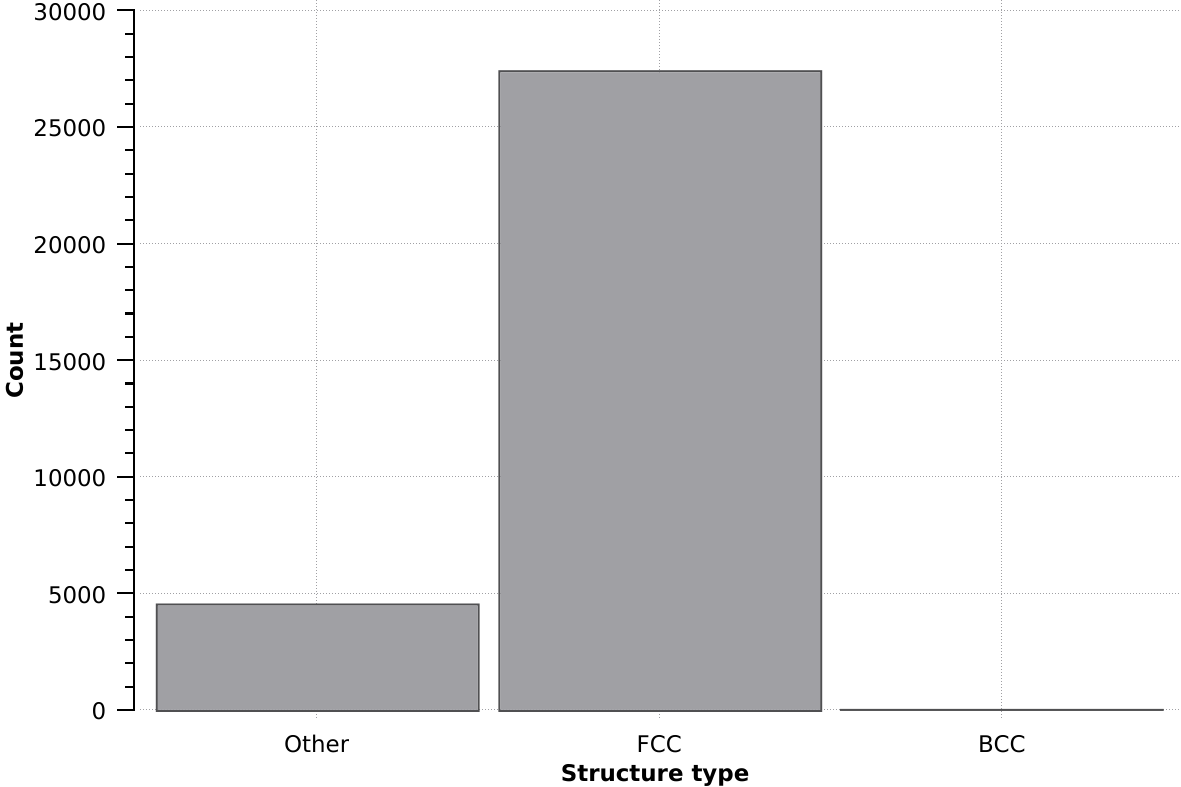

¿Cómo podemos estimar este número? Debe ser mas o menos la cantidad de átomos que están en la frontera. Si tenemos 32000 átomos, y la caja que hicimos en LAMMPS es de 40x40x40 (en unidades `lj`), la densidad de átomos es de 0.5, entonces tenemos aproximadamente $6\times0.5\times 40 \times 40\times 1 =4800$ defectos

Esto es lo de `VoronoiAnalysis`:

#### Análisis de coordinación

De acuerdo con el [manual de OVITO](https://www.ovito.org/docs/current/particles.modifiers.coordination_analysis.php) el parámetro de `Coordination Analysis` retorna el conteo del número de vecinos de cada partícula que se encuentran a una distancia de corte dada alrededor de su posición actual. 

Para el inicio de la simulación ($t=0$), y para distintas distancias de corte, presentamos la siguiente tabla de resultados de la función: 

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-8bgf{border-color:inherit;font-style:italic;text-align:center;vertical-align:top}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-buh4{background-color:#f9f9f9;text-align:left;vertical-align:top}
.tg .tg-mxj2{background-color:#f9f9f9;border-color:inherit;font-style:italic;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-dzk6{background-color:#f9f9f9;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt" colspan="2">Resultados del Análisis de Coordinación, a tiempo de simulación 0<br><br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-buh4"><span style="font-weight:bold">Distancia de corte </span>[u. lj]</td>
    <td class="tg-dzk6"><span style="font-weight:bold">Coordinación </span>[nº vecinos]</td>
  </tr>
  <tr>
    <td class="tg-8bgf">1.2</td>
    <td class="tg-baqh">12</td>
  </tr>
  <tr>
    <td class="tg-mxj2">2.4</td>
    <td class="tg-dzk6">54</td>
  </tr>
  <tr>
    <td class="tg-baqh">3.6<br></td>
    <td class="tg-baqh">176</td>
  </tr>
</tbody>
</table>

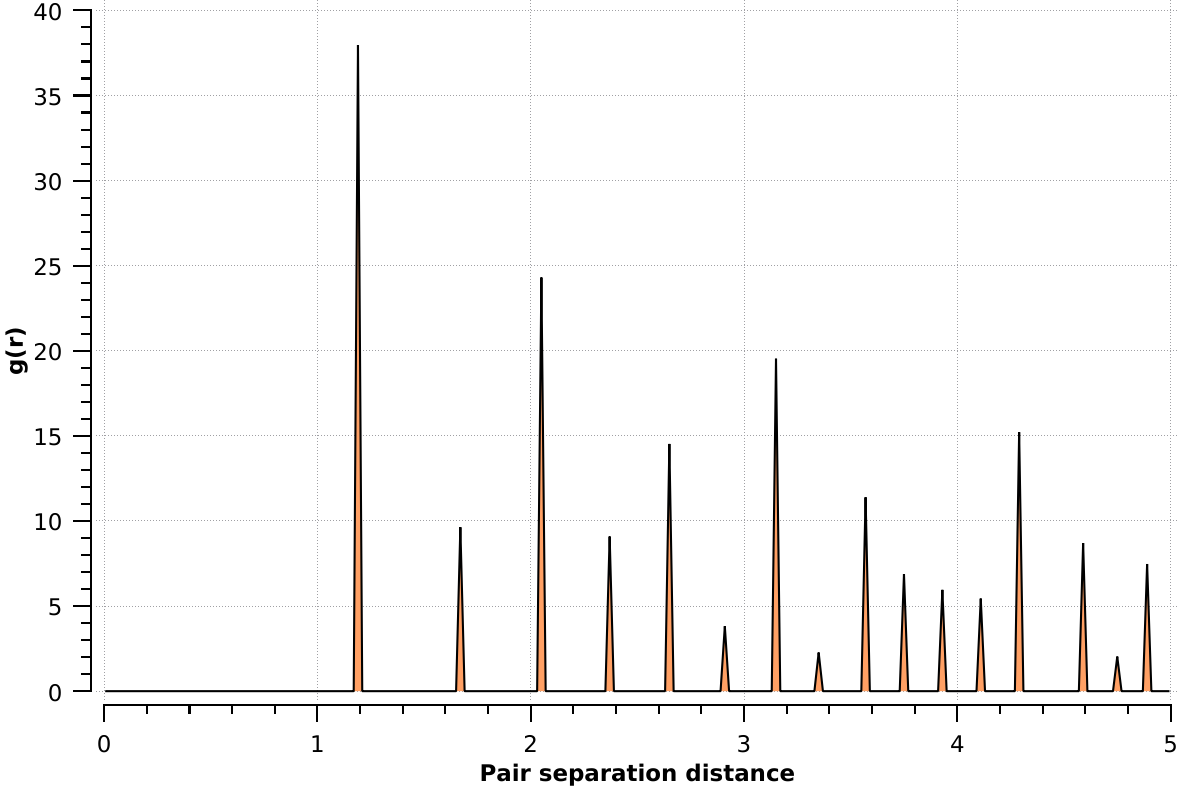

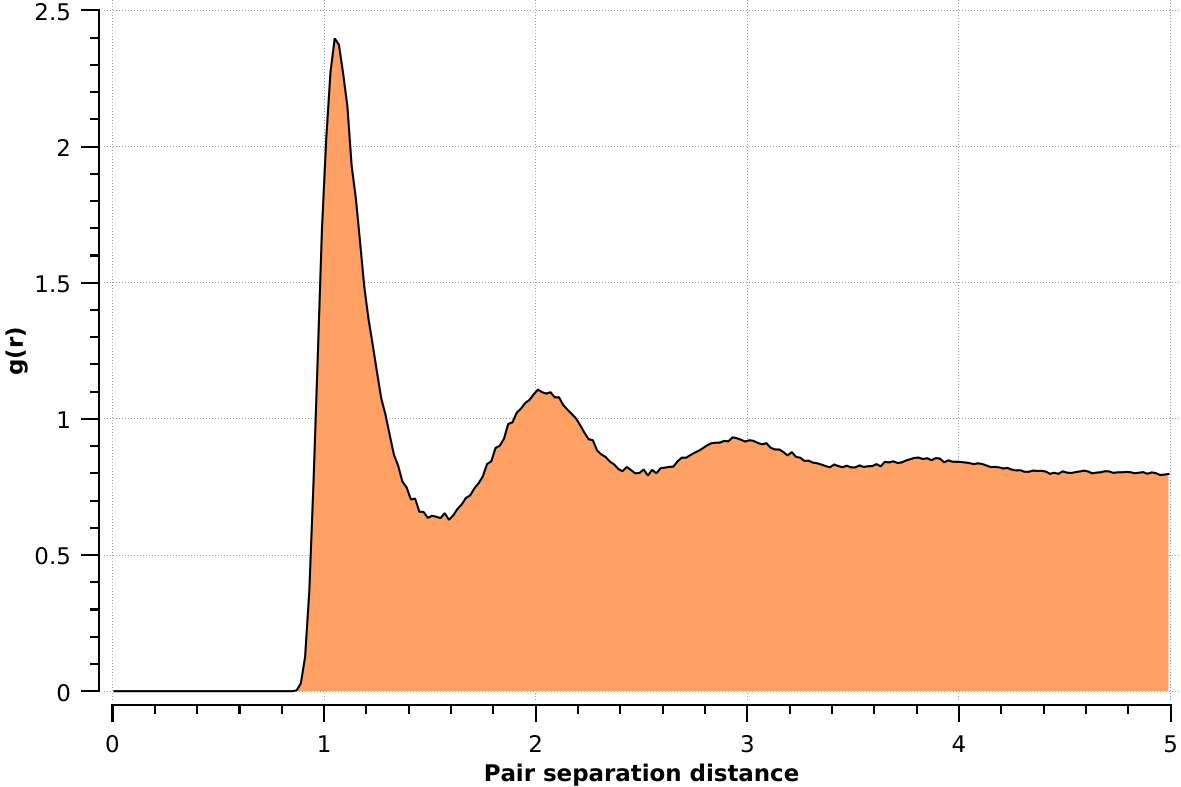

Según análisis de Voronoi, el número de Coordinación es 12, puesto que sólo computa los vecinos cercanos (notemos que si sólo tuviéramos en cuenta el primer pico de `Coordnation Analysis`, los valores de los dos métodos coinciden.

#### Plot de los vectores de desplazamiento

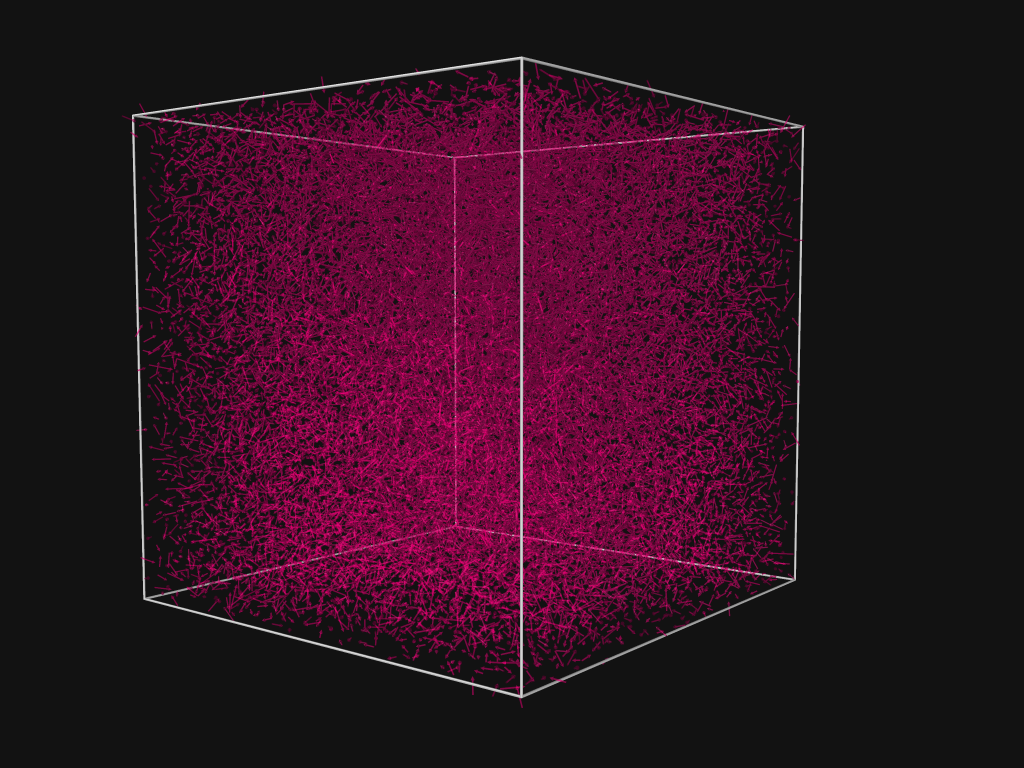

In [90]:
Image("ovito/disp_vec.png")

Los vectores no son homogéneos, dado que los átomos de los bordes por ejemplo, sentirán con seguridad una fuerza neta muy distinta a la de los átomos del centro, por ejemplo. Para estudiar los desplazamiento netos, tenemos que estudiar su distribución. Para eso tomamos las posiciones de los átomos a timestep 0 y a timestep 1000, calculamos los desplazamientos netos por coordenada y después ploteamos los resultados en un histograma.

In [91]:
displacements = np.loadtxt("ovito/displacements_1000.data")

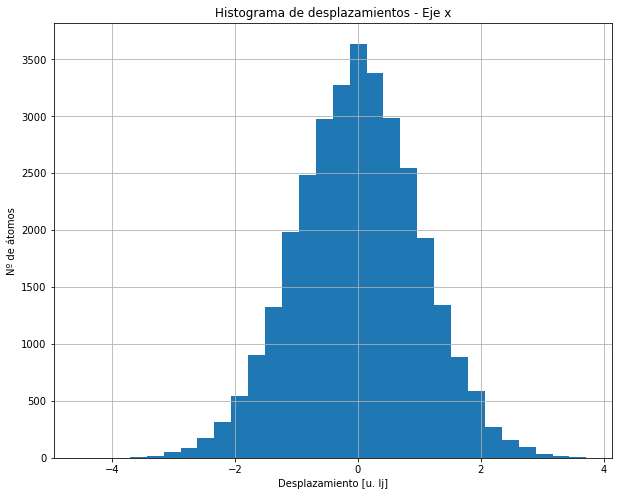

In [93]:
plt.figure(figsize=(10,8))
plt.hist(displacements[:,0],bins=30);plt.title("Histograma de desplazamientos - Eje x");plt.xlabel("Desplazamiento [u. lj]")
plt.ylabel("Nº de átomos");plt.grid();plt.savefig("plots/Desp1000_EjeX_Real.png");plt.show()

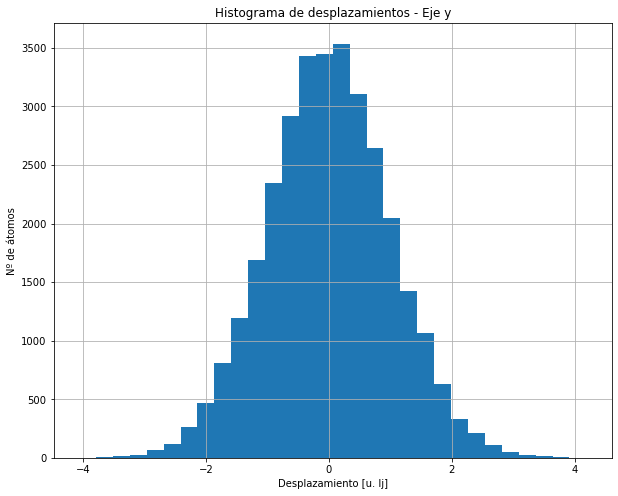

In [94]:
plt.figure(figsize=(10,8))
plt.hist(displacements[:,1],bins=30);plt.title("Histograma de desplazamientos - Eje y");plt.xlabel("Desplazamiento [u. lj]")
plt.ylabel("Nº de átomos");plt.grid();plt.savefig("plots/Desp1000_EjeY_Real.png");plt.show()

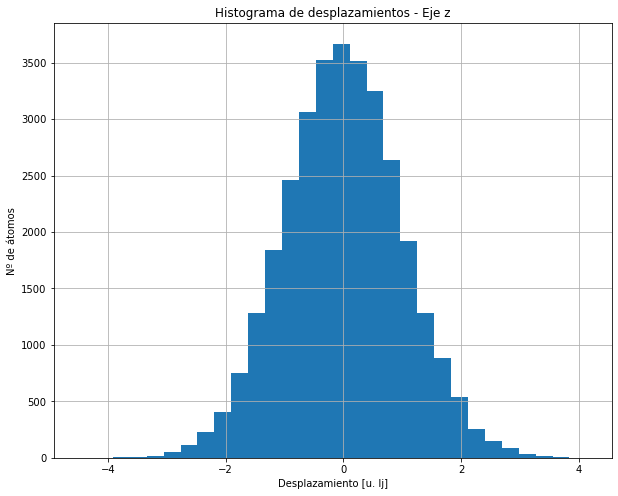

In [95]:
plt.figure(figsize=(10,8))
plt.hist(displacements[:,2],bins=30);plt.title("Histograma de desplazamientos - Eje z");plt.xlabel("Desplazamiento [u. lj]")
plt.ylabel("Nº de átomos");plt.grid();plt.savefig("plots/Desp1000_EjeZ_Real.png");plt.show()

### FINAL BOSS: Cálculo del coeficiente de difusión

 Éste es fácil: tenemos del apunte de Ercolessi la relación entre el MSD y el coeficiente de difusión $D$: $$D = \lim_{t\to\infty}\frac{1}{6t}\big<|\mathbf{r}(t)-\mathbf{r}(0)|\big>,$$ de lo cual se deduce que podemos estimar $D$ numéricamente haciendo una regresión lineal sobre la curva de MSD en función del tiempo en nuestra simulación. 
 
Obtengamos esos datos y hagamos los cálculos.

In [102]:
%%writefile scripts/mymelt_difusion.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt - 3K

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 3.0 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd


dump		id all atom 50 dump_3K.melt

#dump		2 all image 100 image.*.jpg type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal c_1[4]
thermo		50
run		6000

### SEGUNDA CORRIDA
clear
# 3d Lennard-Jones melt - 0.3K

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 0.3 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd


dump		id all atom 50 dump_03K.melt

#dump		2 all image 100 image.*.jpg type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal c_1[4]
thermo		50
run		6000


Overwriting scripts/mymelt_difusion.in


In [103]:
!mpirun -np 4 lmp_mpi -in scripts/mymelt_difusion.in -screen none -l logs/mymelt_difusion303.log

In [104]:
# 3 K
step,time,ep,ek,etotal,msd = np.loadtxt("logs/mymelt_difusion303.log",skiprows=63,max_rows=184-63,unpack=True)

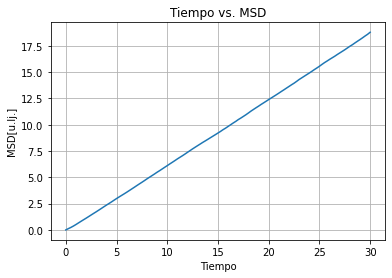

In [121]:
# Chusmeemos los datos

plt.plot(time,msd);plt.title("Tiempo vs. MSD")
plt.xlabel("Tiempo");plt.ylabel("MSD[u.lj.]");plt.grid()
plt.show()

In [109]:
# CON AJUSTE NO LINEAL, PARA PODER CALCULAR EL ERROR DEL COEFICIENTE!

from scipy.optimize import curve_fit,least_squares

def model(x,D):
    return D*x
#Parámetros iniciales para el proceso de fiteo
parametros_iniciales = [0.1]

# Hacemos el ajuste con curve_fit
popt, pcov = curve_fit(model,time,msd,p0=parametros_iniciales)

In [116]:
print('Coeficiente de determinacion R2')

# Suma de los cuadrados de los residuos
ss_res = np.sum( (msd - model(time, *popt))**2  )

# Suma total de cuadrados
ss_tot = np.sum( (msd - np.mean(msd) )**2  )

R2     = 1 - (ss_res / ss_tot)

print('R2 = {:10.8f}'.format(R2) )

Coeficiente de determinacion R2
R2 = 0.99973611


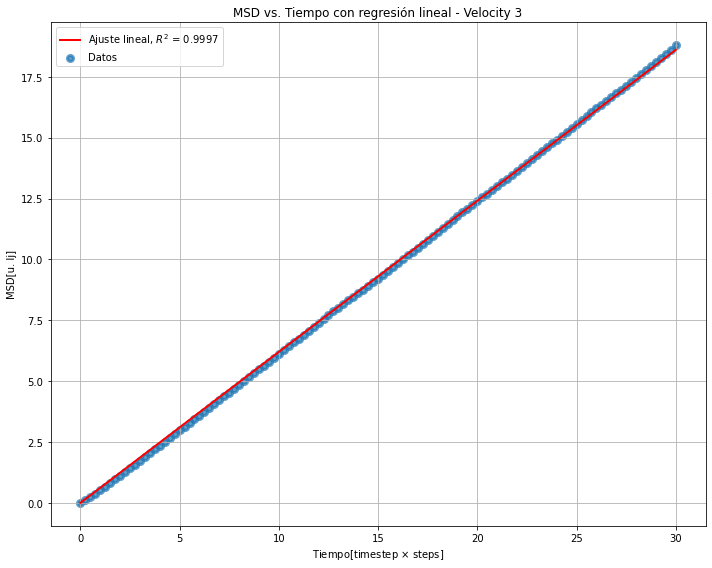

In [119]:
plt.figure(figsize=(10,8))
plt.scatter(time,msd,alpha=0.7,linewidths=3,label="Datos")
plt.plot(time,model(time,*popt),color='red',linewidth=2,label="Ajuste lineal, $R^2$ = "+str(round(R2,4)))
plt.xlabel("Tiempo[timestep $\\times$ steps]");plt.ylabel("MSD[u. lj]")
plt.title("MSD vs. Tiempo con regresión lineal - Velocity 3");plt.legend();plt.grid();
plt.tight_layout()
plt.savefig("plots/Dif_RectayAjuste_3.png")
plt.show()

In [112]:
pstd = np.sqrt(np.diag(pcov))
nombres_de_param=['D']
print('Parámetros hallados:')
for i,param in enumerate(popt):
    print('{:s} = {:5.4f} ± {:5.4f}'.format( nombres_de_param[i] , param , pstd[i]/2) )

Parámetros hallados:
D = 0.6203 ± 0.0002


In [122]:
# Hagamos el otro también de menor temperatura, también pongo un videito para que se note la diferencia cualitativa
#0.3 K
step,time,ep,ek,etotal,msd = np.loadtxt("logs/mymelt_difusion303.log",skiprows=270,max_rows=390-270,unpack=True)

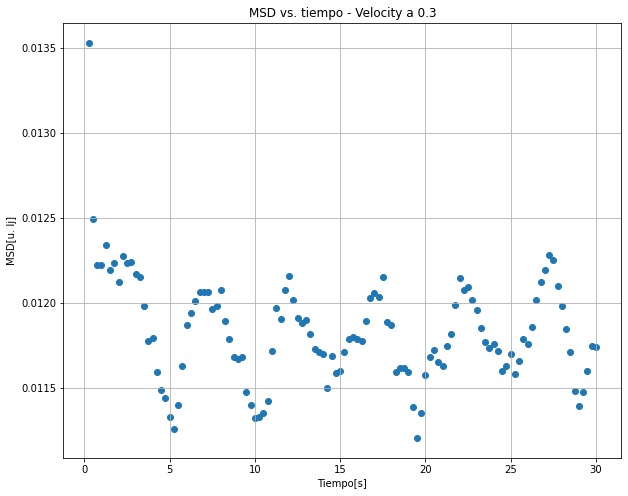

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(time,msd,label="Datos")
plt.title("MSD vs. tiempo - Velocity a 0.3");plt.xlabel("Tiempo[s]");plt.ylabel("MSD[u. lj]");plt.grid()
plt.savefig("plots/Dcoef_03.png")

In [109]:
YouTubeVideo('ZmtvTO2NmA')

##### Último tiro

Seteamos el comando `velocity` a 1.5, para estudiar algún valor intermedio. 

In [126]:
%%writefile scripts/mymelt_difusion_15.in
######################################
# LAMMPS INPUT SCRIPT
# Copia modficada de in.melt original de los examples de LAMMPS!
# Nicolás Vazquez
######################################

# 3d Lennard-Jones melt - 3K

units		lj
atom_style	atomic

lattice		fcc 0.8442
region		box block 0 20 0 20 0 20
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 1.5 87287

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	every 20 delay 0 check no

fix		1 all nve

#Compute MSD (coef de difusión)
compute 1 all msd


dump		id all atom 50 dump_3K.melt

#dump		2 all image 100 image.*.jpg type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	2 pad 3

#dump		3 all movie 25 movie.mp4 type type &
		#axes yes 0.8 0.02 view 60 -30
#dump_modify	3 pad 3

#Output modificado
thermo_style custom step time pe ke etotal c_1[4]
thermo		50
run		6000

Overwriting scripts/mymelt_difusion_15.in


In [127]:
!mpirun -np 4 lmp_mpi -in scripts/mymelt_difusion_15.in -screen none -l logs/mymelt_difusion_15.log

In [130]:
# 1.5
step,time,ep,ek,etotal,msd = np.loadtxt(
    "logs/mymelt_difusion_15.log",skiprows=63,max_rows=184-63,unpack=True)

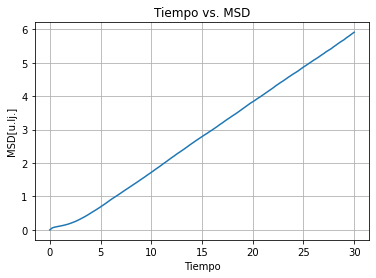

In [131]:
# Chusmeemos los datos

plt.plot(time,msd);plt.title("Tiempo vs. MSD")
plt.xlabel("Tiempo");plt.ylabel("MSD[u.lj.]");plt.grid()
plt.show()

Vemos que el sistema tarda un poco más en estabilizarse y adquirir su comportamiento lineal. De todas formas no vamos a descartar ningún dato. 

Si corriéramos muchas veces la simulación podríamos tratar de estimar la dependencia del coeficiente $D$ con `velocity`, que en cierta forma es una estimación de la temperatura puesto que indica la forma de la distribución de velocidades de los átomos.

Hagamos el ajuste.

In [135]:
# Hacemos el ajuste con curve_fit
popt, pcov = curve_fit(model,time,msd,p0=parametros_iniciales)

print('Coeficiente de determinacion R2')

# Suma de los cuadrados de los residuos
ss_res = np.sum( (msd - model(time, *popt))**2  )

# Suma total de cuadrados
ss_tot = np.sum( (msd - np.mean(msd) )**2  )

R2     = 1 - (ss_res / ss_tot)

print('R2 = {:10.8f}'.format(R2) )

Coeficiente de determinacion R2
R2 = 0.99300080


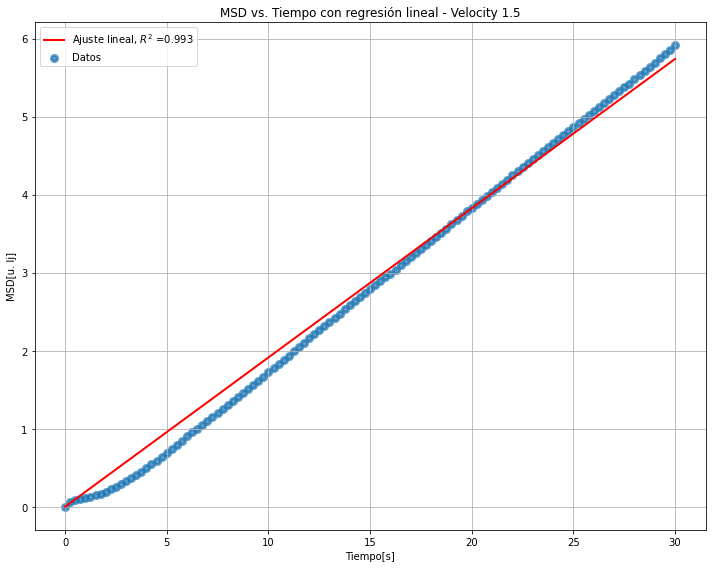

In [136]:
plt.figure(figsize=(10,8))
plt.scatter(time,msd,alpha=0.7,linewidths=3,label="Datos")
plt.plot(time,model(time,*popt),color='red',linewidth=2,label="Ajuste lineal, $R^2$ ="+str(round(R2,5)))
plt.xlabel("Tiempo[s]");plt.ylabel("MSD[u. lj]")
plt.title("MSD vs. Tiempo con regresión lineal - Velocity 1.5");plt.legend();plt.grid()
plt.tight_layout()
plt.savefig("plots/Dif_RectayAjuste_15.png")
plt.show()

Si bien no hemos descartado los primeros datos donde se ve que el sistema está en proceso de estabilizarse, el comportamiento estadístico del sistema es bueno y el ajuste nos da bien. Nótese que lo estamos forzando a pasar por el origen, si dejáramos ese grado de libertad de la ordenada, quizá el coeficiente nos daría mejor...

In [137]:
pstd = np.sqrt(np.diag(pcov))
nombres_de_param=['D']
print('Parámetros hallados:')
for i,param in enumerate(popt):
    print('{:s} = {:5.4f} ± {:5.4f}'.format( nombres_de_param[i] , param , pstd[i]/2) )

Parámetros hallados:
D = 0.1913 ± 0.0004
